In [3]:
# autoreload reloads modules automatically before before executing user code
%load_ext autoreload
%autoreload 2

%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

### Jupyter's trick
- Tab: Compelete  
- Shift + Tab Parameter: Quick inspect the parameters  
- Shift + Tab X2 or X3: More information  
- ??function: Get soure code  
- ?function: Get documentation
- Running a bash command in a Jupyter notebook using !
    - !ls {PATH} Python variables must be inside the {}
    - !ls -lh: Get size of a file
    - !wc -l file_name: Get number of rows of a csv file
- %prun: Show execution time

### Pandas
- Pandas works really well with numpy: We can apply a numpy function on a Pandas Series. Ex: df.SalePrice = np.log(df.SalePrice)
- Remove a column from DataFrame: df.drop(column_name, axis = 1)
- Useful read_csv parameters
```python
pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=["saledate"])
# low_memory=False : parse all dtypes of the file
# parse_dates=[] : give all columns that are with dtype data (and will convert them to DataTime dtype)
```
- A good practice is to save/load DataFrame by using feather so we can access it efficiently:
```python
os.makedirs('tmp', exist_ok=True)  # Create a folder
df.to_feather('tmp/raw')  # Save
df = pd.read_feather('tmp/raw')  # Load
```

### Data set
- If the dataset contain a mix of continuous and categorical variables, convert everything into numbers.
- Always do feature extraction step when working with __date-time__, so we can capture any trend/cyclical behavior like holiday, weekend, sport event, rainning that day, etc. df.saledate.__dt.__
- Always do as much of our works as we can on a small sample of the data.
- Remove outliers which make sense and there is no other variable to capture those outlier. For example: If the store has extra sale data before and after closing period, and we don’t have any data to model the outliers then we should remove them during training.
- If we don't have a good validation set, it's impossible to create a good model.
- Normalization

### Training

### Learning Rate

### Activation Functions

### Evaluate success and iterate
- Cross validation and testing
- Grid search

### Prototype a Machine Learning Algorithm
_Regression_: Predict continous variables  
_Classify_: Predict categorical variables

### Theorems, Lingos, Terms
_Curse of dimensionality_: The more columns we have, the more empty space it creates. KNN works very well in high dimensions despite what the theory said because the points still have different distances away from each other.

_No free lunch theorem_: In theory, there is no model that works well for any kind of dataset. In practice, we can use random forest for nearly all kind of dataset.

_Churn_: Loss of users

_Viral coefficient_: the ability of a business to tap into an early user base and get that user base to tell other people about it. If a site has a viral coefficient of 10%, and has 1,000 users, then after one month it will gain another 100 users through viral channels.

_Ground truth_: Ground truth refers to strong labels that have a high likelihood of being accurate, knowledge that we're very sure is True.

_Correlation does not imply causation!_: Just because we can see a connection or a mutual relationship between two variables, it doesn't mean that one causes the other.

_Cardinality_: The number of levels in a category (Sex has a cardinality of 2, zipcode has a cardinality of 5000)

_A/B Testing_

### Other Tips
- r^2 score: Ratio between how good my model is VS how good is the naive mean model
- In python use _ variable if we want to throw something away
- Tips when doing projects:
    - Build a Random Forest as fast as we can, try to get into the point that it's significan better than random.
    - Find feature important by randoming shuffle 1 feature, run through the same model, make prediction, then compare to previous RMSE. Plot the future important.
    - Talk to client about the important features, what does that mean, where does it come from. They might disagree with important feature from our plots. Thus client might miss-understanding of the data they gave us and we have a __data leakage__ problem (There is information in the data set that we were modeling with which client wouldn't have had in real life at the point when they were making a decision) 
    - Start throwing out unimportant features away.
    - Create a new Random Forest to see if our score doesn't change much.
    - Removing redundant features by using a dendrogram (hierarchical clustering).
    - Partial dependence: A powerful technique to find out for the features that are important, how do they realate to the dependent variables.

### Random Forest

Random Forest constructs a multiple of decision trees at training time and output the class labels (Classification) or mean prediction (Regression) of the individual trees.

Random Forest is kind of universal ML algo works with any kind of data. It's not overfit, doesn't assume our data is normally distributed, doesn't assume the relationship is linear, require a little of feature engineering. 
- Build a decision tree from scratch:  
    - Calculate the root mean squared error of the 1st split. This number would represents how good a split is.
    - Try all variables and all possible value of that variable and see which variable and which value gives us a split with the best score.
    - Stop splitting when the leaf node only has 1 thing in it.
- Random Forest (Predict on uncorrelated trees):  
    - Grab some rows as random then put them into a smaller dataset and build a tree based on that
    - Do it again with a different random subset
    - Make prediction on each tree
    - Take an average  
- Use Out-of-bag (OOB) error to prevent over fitting or for small dataset: Pass un-used rows to the 1st tree and treat it as a validation set. Do the same thing for a 2nd tree. To calculation prediction, we would average all the trees where that row is not used for training
- Confidence of tree level: We calculate the standard deviation for each row that we got from the random forest model, then we group them according to difference variables or predictors to see which particular prediction has high standard deviation.
- Tree interpreter: Doing feature important for a particular observation. Ex: Which feature will impact a patient to readmit to the hospital and how can we change that.

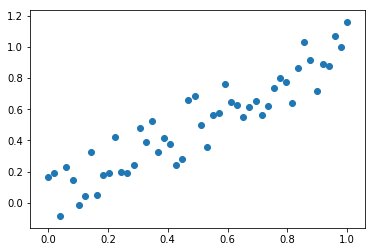

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import display
from sklearn import metrics

# Generate data
X = np.linspace(0,1)
y = X + np.random.uniform(-0.2,0.2,X.shape)
plt.scatter(X,y)

In [79]:
# Convert 1D to 2D array
X = X[:,None]

In [80]:
# Split train and test set
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

In [83]:
# Create a Random Forest model
model = RandomForestRegressor(n_estimators=1, max_depth=1, bootstrap=False)
# Fit the model
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
# Make prediction
pred = model.predict(X_test)

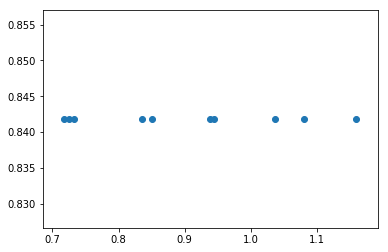

In [62]:
# Plot the result
plt.scatter(y_test, pred)

In [ ]:
We can fix this by using a Gradient Boosting Machine

### Reduce over-overfitting
- Subsampling: The easiest way to avoid over-fitting is also the best way to speed up analysis. Rather then limit the total amount of data our model can access, we just limit it to a _different_ random subset per tree. Given enough trees, the model can still see _all_ the data.  